In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [5]:
df = pd.read_csv("../../data/telecom_churn.csv")

In [6]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 1. Признаки по одному 
## 1.1. Количественные
Гистограмма и боксплот

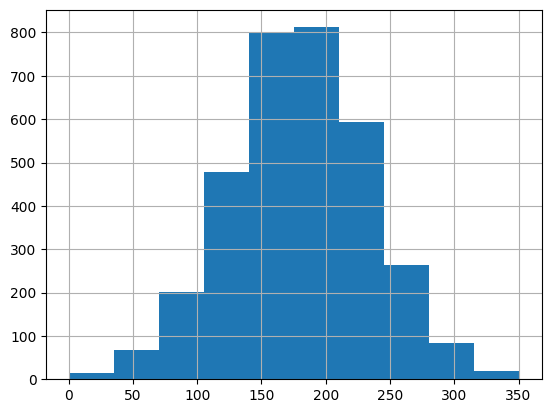

In [7]:
df["Total day minutes"].hist();

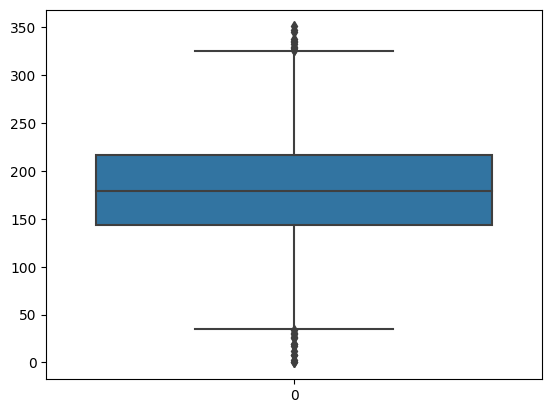

In [8]:
sns.boxplot(df["Total day minutes"]);

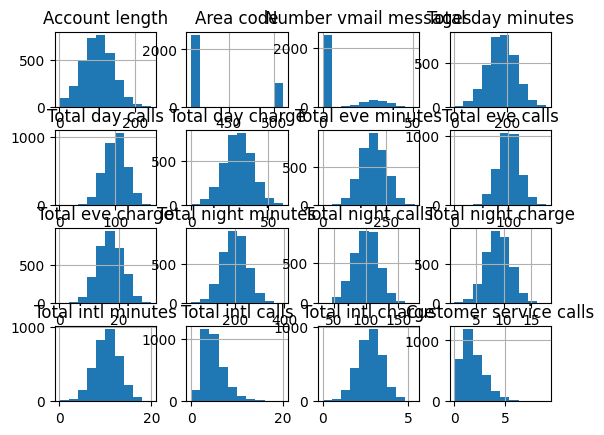

In [9]:
df.hist();

# 1.2. Категориальные
countplot

In [10]:
df["State"].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

In [11]:
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

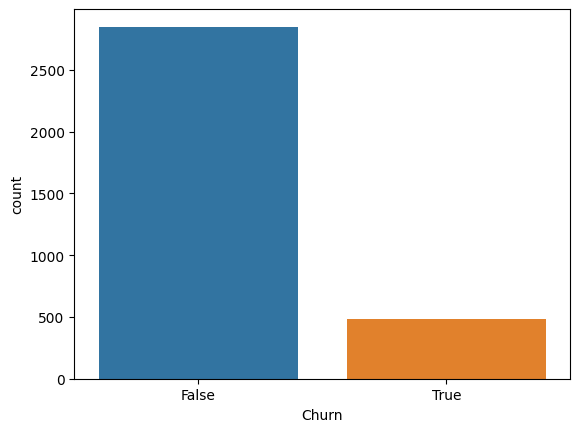

In [12]:
sns.countplot(x=df["Churn"]);

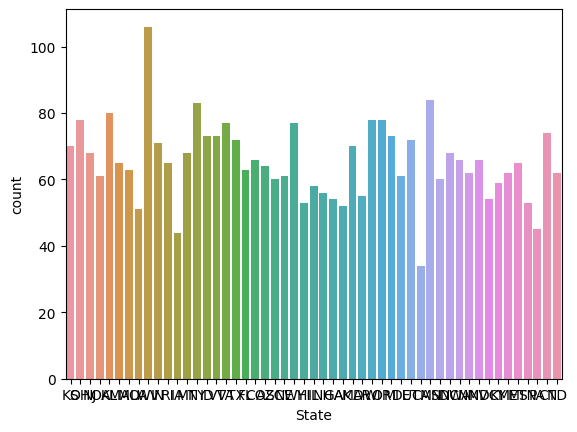

In [13]:
sns.countplot(x=df["State"]);

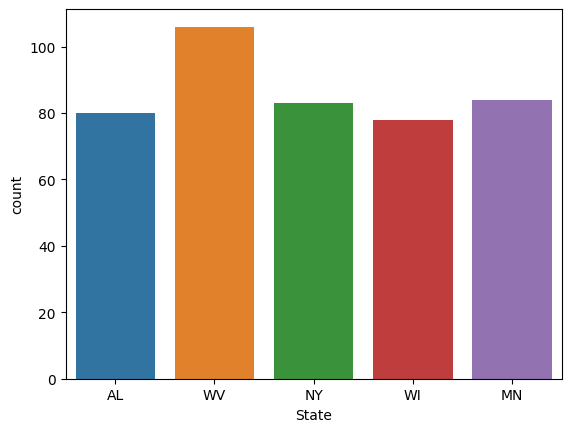

In [14]:
sns.countplot(x=df[df["State"].isin(df["State"].value_counts().head().index)]["State"]);

# 2. Взаимодействия признаков
## 2.1. Количественный с количественным
pairplot, scatterplot, корреляции, heatmap

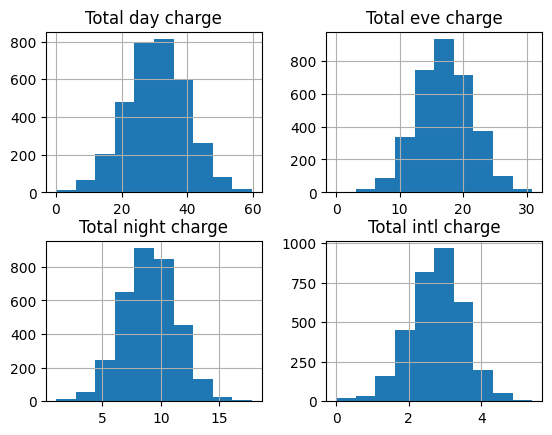

In [15]:
feat = [f for f in df.columns if "charge" in f]

df[feat].hist();

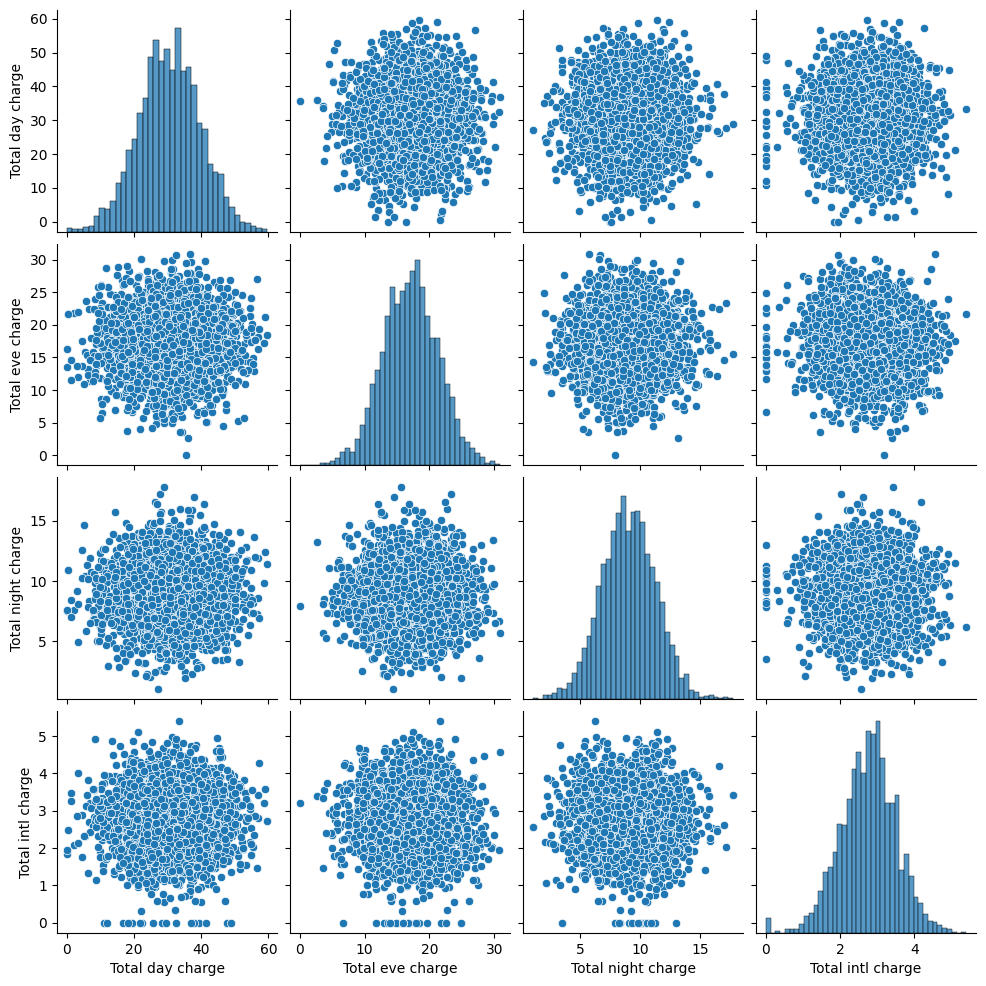

In [16]:
sns.pairplot(df[feat]);

In [17]:
# df["Churn"] = df["Churn"].map({0: False, 1: True})
# df["Churn"].map({False: "blue", True: "orange"}).head()

In [38]:
df[~df["Churn"]].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,Yes,No,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,Yes,No,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


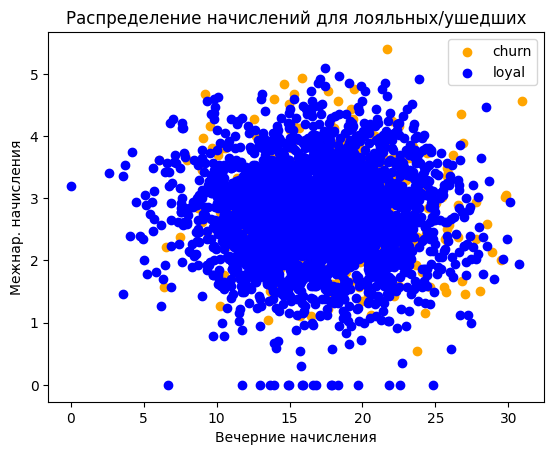

In [19]:
plt.scatter(
    df[df["Churn"]]["Total eve charge"],
    df[df["Churn"]]["Total intl charge"],
    color="orange",
    label="churn",
)
plt.scatter(
    df[~df["Churn"]]["Total eve charge"],
    df[~df["Churn"]]["Total intl charge"],
    color="blue",
    label="loyal",
)
plt.xlabel("Вечерние начисления")
plt.ylabel("Межнар. начисления")
plt.title("Распределение начислений для лояльных/ушедших")
plt.legend();

C:\Users\Zetis\AppData\Local\Temp\ipykernel_14948\1314748376.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr());


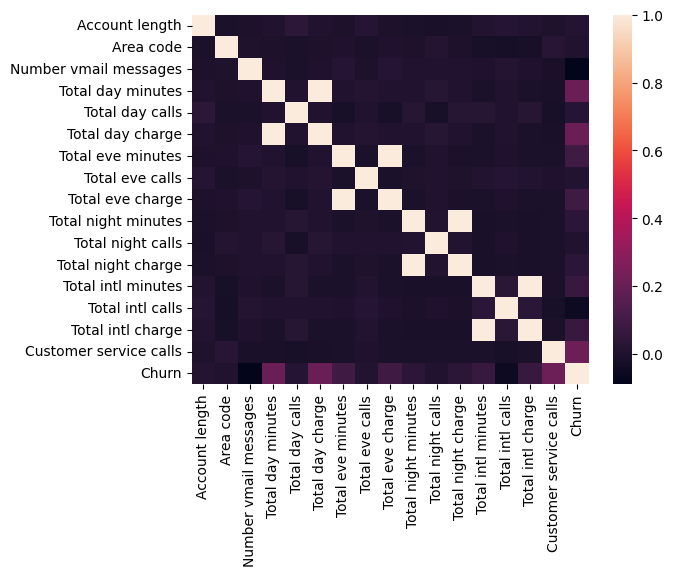

In [20]:
sns.heatmap(df.corr());

In [21]:
df.drop(feat, axis=1, inplace=True)

C:\Users\Zetis\AppData\Local\Temp\ipykernel_14948\1314748376.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr());


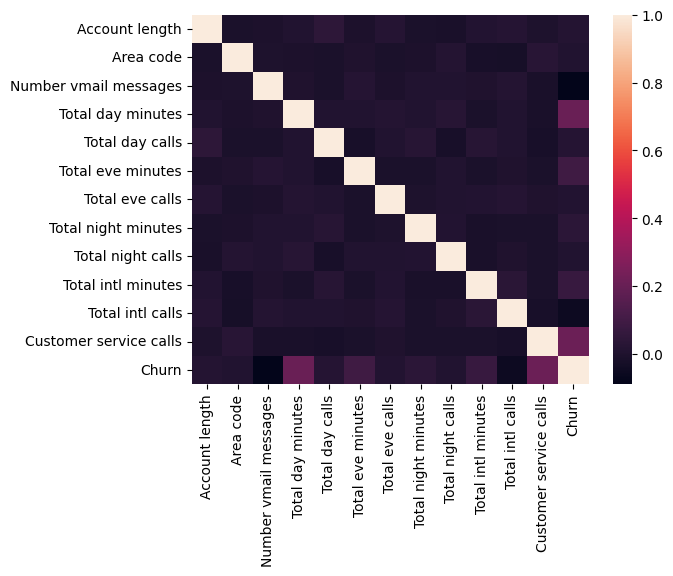

In [22]:
sns.heatmap(df.corr());

## 2.2.  Количественный с категориальным
boxplot, violinplot

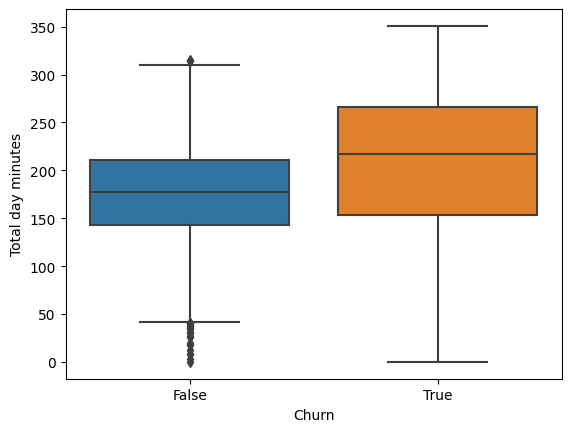

In [23]:
sns.boxplot(x="Churn", y="Total day minutes", data=df);

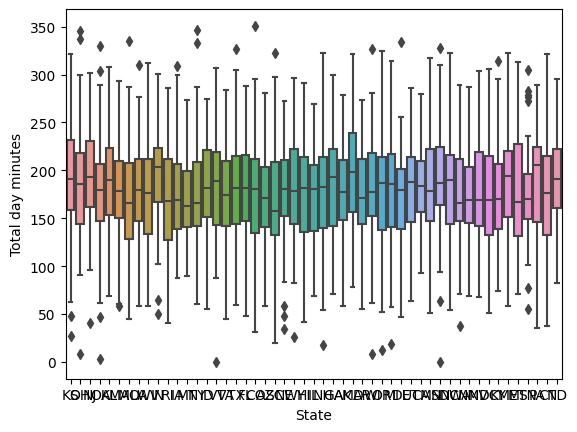

In [24]:
sns.boxplot(x="State", y="Total day minutes", data=df);

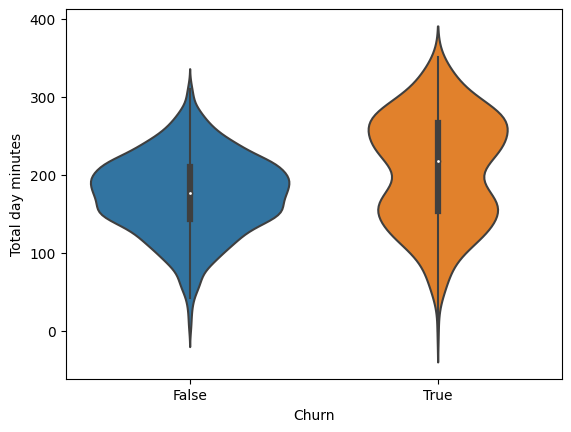

In [25]:
sns.violinplot(x="Churn", y="Total day minutes", data=df);

In [26]:
df.groupby("International plan")["Total day minutes"].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

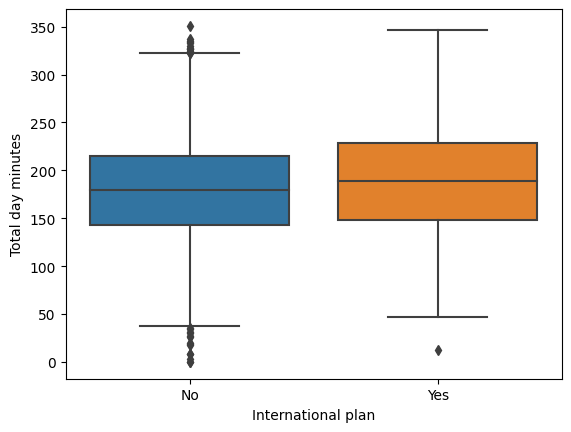

In [27]:
sns.boxplot(x="International plan", y="Total day minutes", data=df);

## 2.3. Категориальный с категориальным
countplot

In [28]:
pd.crosstab(df["Churn"], df["International plan"])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


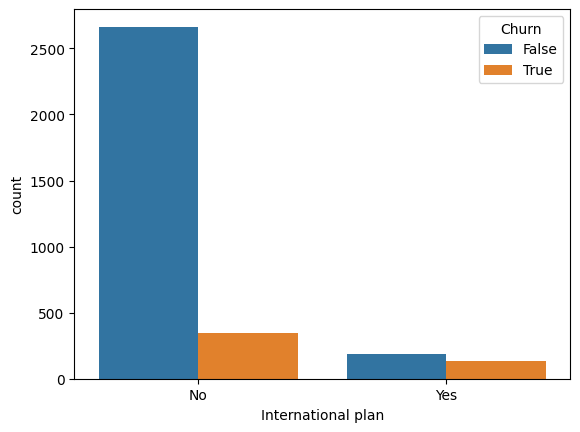

In [29]:
sns.countplot(x="International plan", hue="Churn", data=df);

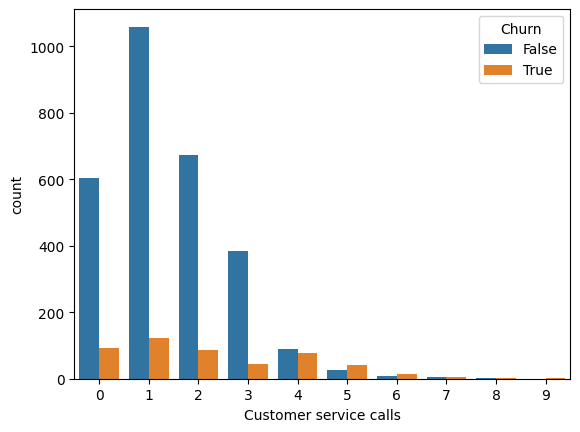

In [30]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

## 3. Прочее
Manifold learning, один из представителей – t-SNE

In [31]:
from sklearn.manifold import TSNE

In [32]:
tsne = TSNE(random_state=0)

In [33]:
df2 = df.drop(["State", "Churn"], axis=1)

In [34]:
df2["International plan"] = df2["International plan"].map({"Yes": 1, "No": 0})
df2["Voice mail plan"] = df2["Voice mail plan"].map({"Yes": 1, "No": 0})

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Voice mail plan         3333 non-null   int64  
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total eve minutes       3333 non-null   float64
 8   Total eve calls         3333 non-null   int64  
 9   Total night minutes     3333 non-null   float64
 10  Total night calls       3333 non-null   int64  
 11  Total intl minutes      3333 non-null   float64
 12  Total intl calls        3333 non-null   int64  
 13  Customer service calls  3333 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 3

In [36]:
%%time
tsne.fit(df2)

C:\Users\Zetis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Zetis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: total: 1min 38s
Wall time: 9.52 s


TSNE(random_state=0)

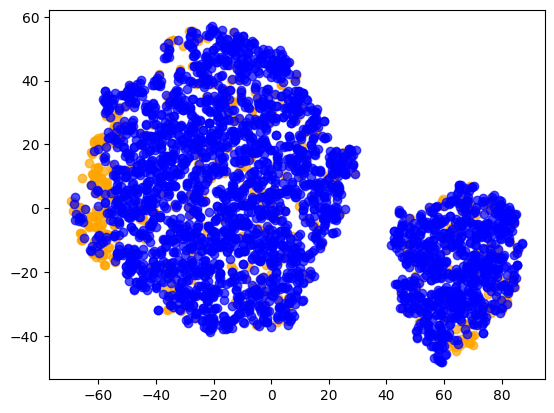

In [37]:
plt.scatter(
    tsne.embedding_[df["Churn"].values, 0],
    tsne.embedding_[df["Churn"].values, 1],
    color="orange",
    alpha=0.7,
)
plt.scatter(
    tsne.embedding_[~df["Churn"].values, 0],
    tsne.embedding_[~df["Churn"].values, 1],
    color="blue",
    alpha=0.7,
);